# Advanced Statistics for Physics Analysis 2020 - 2021
## Lab 6 - Saverio Monaco

In [3]:
options(repr.plot.width=10, repr.plot.height=7)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1

The  number  of  particles  emitted  by  a  radioactive  source  during  a  fixed  interval  of  time  (∆t=10 s) follows a Poisson distribution on the parameter μ.  The number of particles observed during consecutive time intervals is:  4, 1, 3, 1 and 3

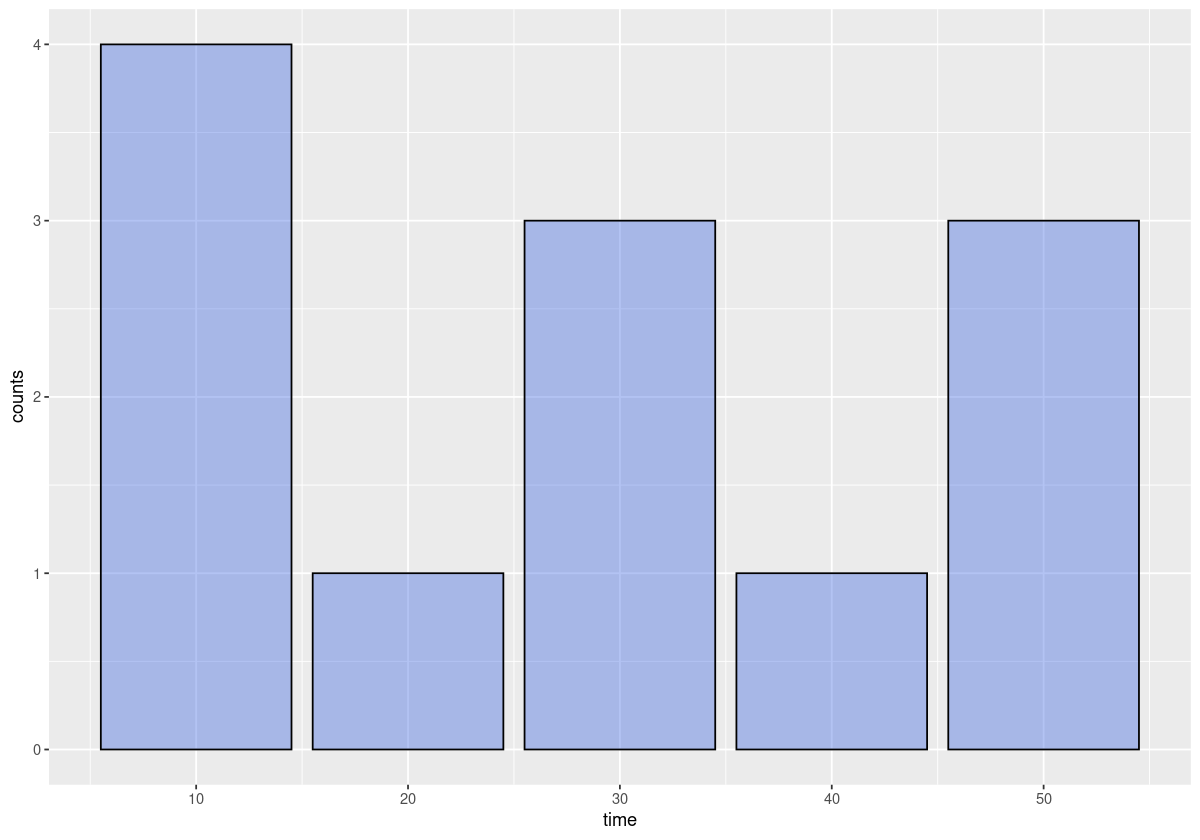

In [4]:
obs <- c(4,1,3,1,3)
dt <- 10
t <- seq(1:length(obs))*10

decay <- data.frame(time=t, counts=obs)

ggplot(decay) + geom_bar(aes(x=time, y=counts), stat="identity",fill=I("royalblue"),col=I("black"),alpha=.4)



### 1.1 Suppose a uniform prior distribution for the parameter μ:
### - determine and draw the posterior distribution for μ, given the data

In [5]:
# Uniform prior is the most ignorant one, mu can be any number from 0 to infinity. The uniform prior is impoper
# since the area covered diverges (not actually a probability distribution)

Uniform prior:

$$g(\mu)=1\quad \text{for   }\space \mu>0$$


In [6]:
# The likelihood is proportional to the Gamma function:

$$Gamma(\sum x_j + 1, n)$$

where 

n = # of measurements

$x_j$ = measurement at time j

In [7]:
ex1posterior1 <- function(decay,x)
    {
        return(dgamma(x,sum(decay[, 'counts'])+1,length(decay$counts)))
    }

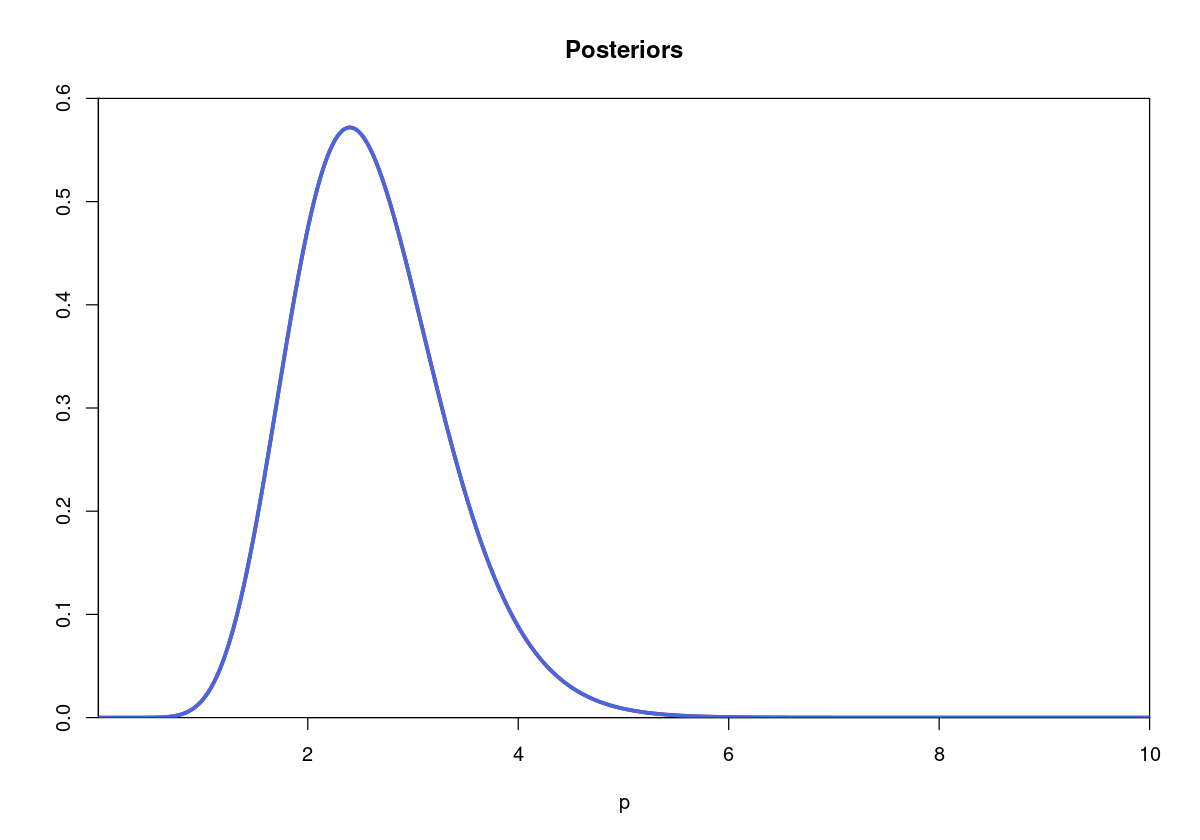

In [8]:
step <- 0.01
mu <- seq(0.01,10,step)

plot(mu,ex1posterior1(decay,mu), xaxs='i', yaxs='i', col='red',
    type = 'l', lty = 1, lwd = 3,ylim=c(0,0.6), xlab='p', ylab="",main='Posteriors')

lines(mu,ex1posterior1(decay,mu),col='royalblue', type = 'l', lty = 1, lwd = 3)

In [9]:
norm <- integrate(function(mu) {ex1posterior1(decay,mu)}, lower=0, upper=10)
round(norm$value,5)

[1] 1

### - evaluate mean, median and variance, both analytically and numerically in R

In [10]:
numericalmedian <- function(x,step)
    {
        area <- 0
        pos  <- 0
        while(area < 0.5)
            {
                pos  <- pos + 1 
                area <- area + step*x[pos]
            }
        return(pos*step)
    }

numericalmean <- function(x,step)
    {
        i <- seq(0.01,10,step)   
        return( sum(x*i)/100 )
    }

numericalvariance <- function(x,step)
    {
        i <- seq(0.01,10,step)   
        return(sum( x*(i-numericalmean(x,step))^2 )/100)
    }

numericalmode <- function(dist,step)
    {
        indx <- match(max(dist),dist)
        return (step*indx)
    }

In [11]:
unifnummedian <- numericalmedian(ex1posterior1(decay,mu),step)
unifnummean   <- numericalmean(ex1posterior1(decay,mu),step)
unifnumvar    <- numericalvariance(ex1posterior1(decay,mu),step)

print('-----------------')
print('    NUMERICAL    ')
print('-----------------')
print(paste0('Mean:      ',unifnummean))
print(paste0('Median:    ',unifnummedian))
print(paste0('Variance:  ',unifnumvar))

[1] "-----------------"
[1] "    NUMERICAL    "
[1] "-----------------"
[1] "Mean:      2.59999999870766"
[1] "Median:    2.53"
[1] "Variance:  0.519999992595809"


In [12]:
unifanmean = (sum(decay[, 'counts'])+1) / length(decay$counts)
unifanvar  = (sum(decay[, 'counts'])+1) / length(decay$counts)^2

# using the quantile function, the median is that point for which p = 1/2
unifanmedian = round(qgamma(0.5, sum(decay[, 'counts'])+1,length(decay$counts) ),2)

print('-----------------')
print('    ANALYTICAL   ')
print('-----------------')
print(paste0('Mean:      ',unifanmean))
print(paste0('Median:    ',unifanmedian))
print(paste0('Variance:  ',unifanvar))

[1] "-----------------"
[1] "    ANALYTICAL   "
[1] "-----------------"
[1] "Mean:      2.6"
[1] "Median:    2.53"
[1] "Variance:  0.52"


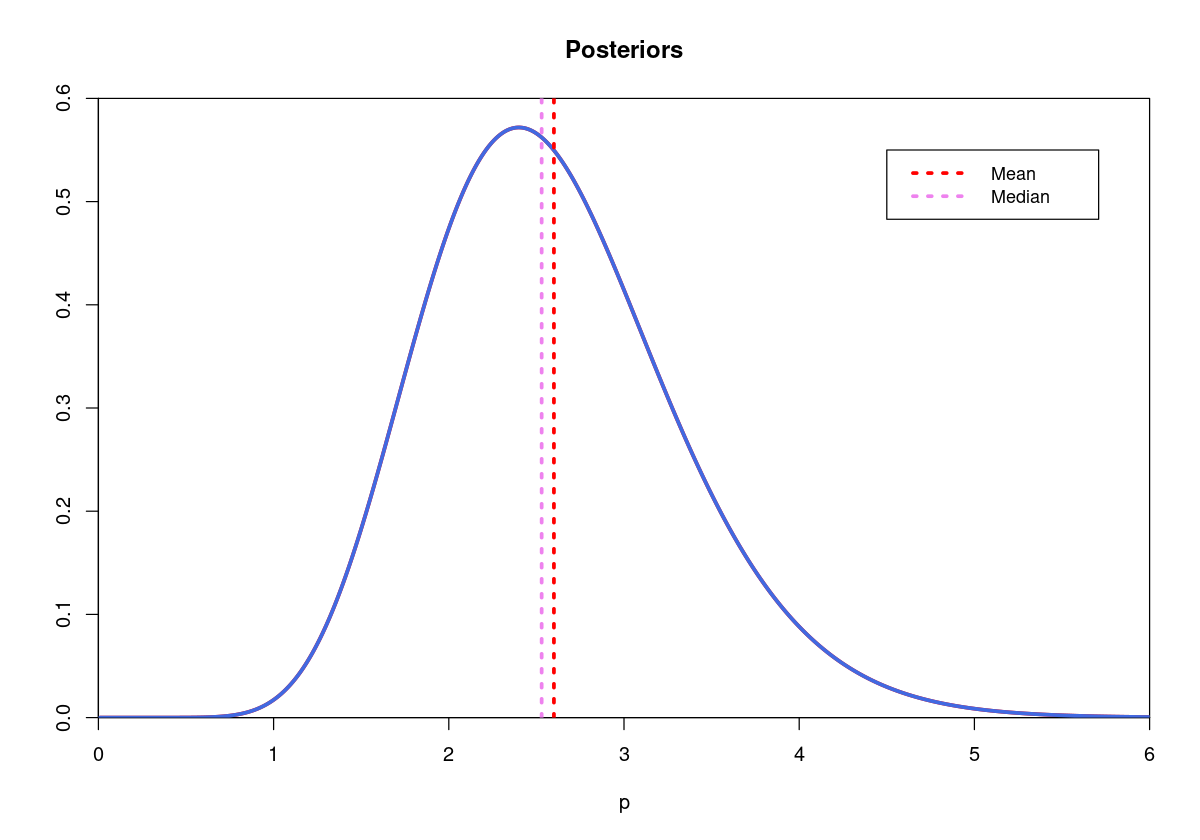

In [13]:
plot(mu,ex1posterior1(decay,mu), xaxs='i', yaxs='i', col='red',
    type = 'l', lty = 1, lwd = 3,xlim=c(0,6),ylim=c(0,0.6), xlab='p', ylab="",main='Posteriors')

lines(mu,ex1posterior1(decay,mu),col='royalblue', type = 'l', lty = 1, lwd = 3)
abline(v=unifanmean, col="red", lwd=3, lty=3)
abline(v=unifanmedian, col="violet", lwd=3, lty=3)
legend(4.5, .55, legend=c("Mean", "Median"), col=c("red", "violet"), lty=3, cex=.9, lwd = 3)

### 1.2 Suppose a Jeffrey’s prior for the parameter μ
### - determine and draw the posterior distribution for μ, given the data
### - evaluate mean, median and variance, both analytically and numerically in R

Jeffrey's prior:

$$g(\mu)\propto\frac{1}{\sqrt{\mu}}\quad \text{for}\space\mu>0$$

It is still an improper prior
$$\int_0^\infty g(\mu)\,d\mu =+\infty$$

Warning message in sqrt(mu):
“NaNs produced”
Warning message in sqrt(mu):
“NaNs produced”


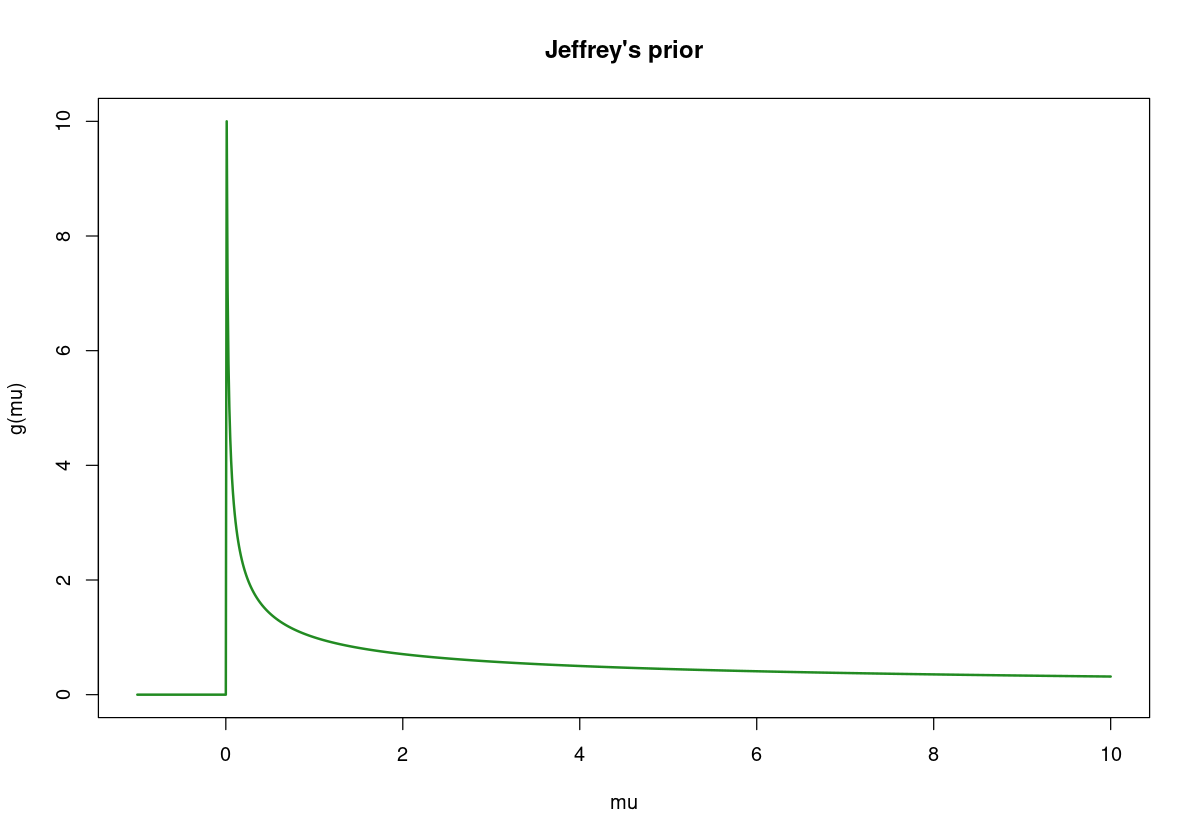

In [14]:
jeffreysprior <- function(mu)
    {
        ifelse(mu>0, 1/(sqrt(mu)), 0)
    }

jeffreymu <- seq(-1,10,0.01)

plot(jeffreymu,jeffreysprior(jeffreymu),pch='.',main='Jeffrey\'s prior',xlab='mu',ylab='g(mu)')
lines(jeffreymu,jeffreysprior(jeffreymu),col='forestgreen',lwd=2)

In [15]:
posteriorfromjeffrey <- function(data,x)
    {
        alpha  <- sum(data) + 0.5
        lambda <- sum(length(data))
    
        return(dgamma(x,alpha,lambda))
    }

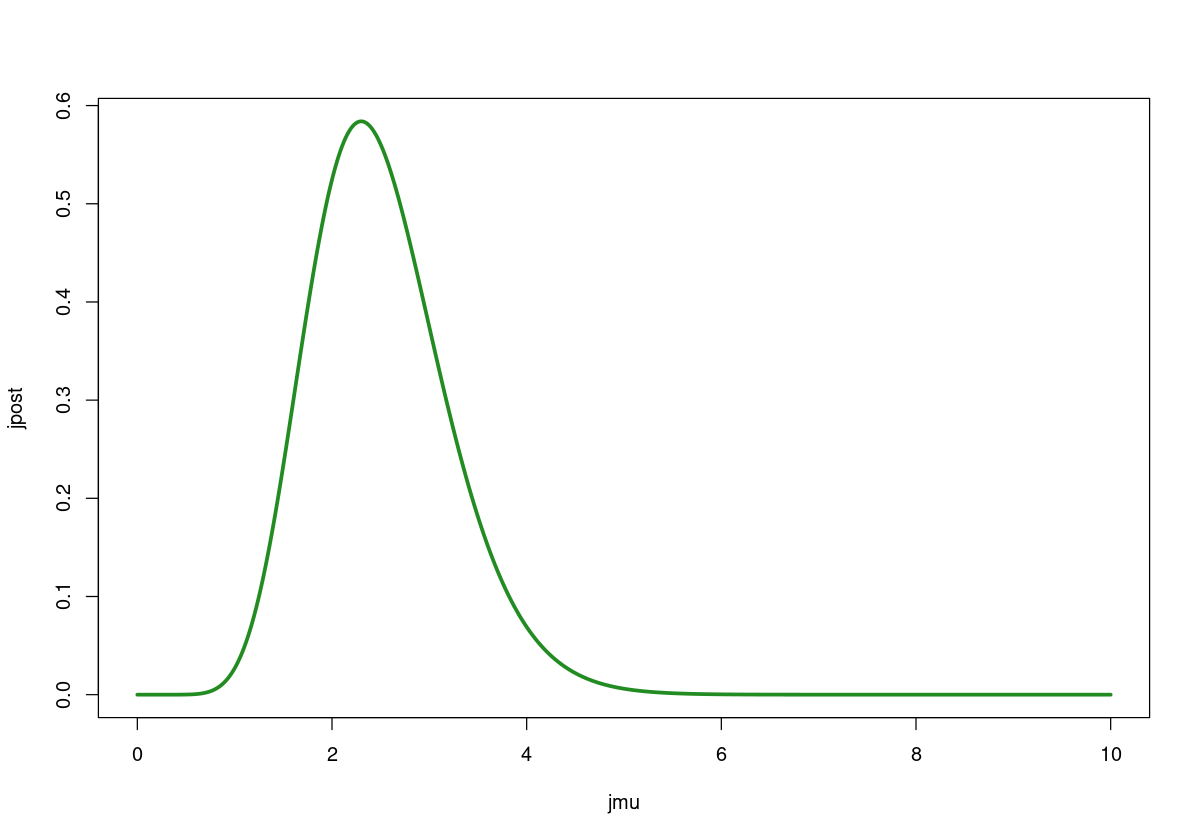

In [16]:
jmu <- seq(0,10,0.01)
jpost <- posteriorfromjeffrey(decay$counts,jmu)

plot(jmu,jpost,pch='.')
lines(jmu,jpost,col='forestgreen', type = 'l', lty = 1, lwd = 3)


In [17]:
norm <- integrate(function(mu) {posteriorfromjeffrey(decay$counts,mu)}, lower=0, upper=10)
norm

1 with absolute error < 5.8e-09

In [18]:
jeffreynummedian <- numericalmedian(posteriorfromjeffrey(decay$counts,mu),step)
jeffreynummean   <- numericalmean(posteriorfromjeffrey(decay$counts,mu),step)
jeffreynumvar    <- numericalvariance(posteriorfromjeffrey(decay$counts,mu),step)

print('-----------------')
print('    NUMERICAL    ')
print('-----------------')
print(paste0('Mean:      ',jeffreynummean))
print(paste0('Median:    ',jeffreynummedian))
print(paste0('Variance:  ',jeffreynumvar))

[1] "-----------------"
[1] "    NUMERICAL    "
[1] "-----------------"
[1] "Mean:      2.49999999936859"
[1] "Median:    2.43"
[1] "Variance:  0.499999996289531"


In [19]:
jeffreyanmean = (sum(decay[, 'counts'])+.5) / length(decay$counts)
jeffreyanvar  = (sum(decay[, 'counts'])+.5) / length(decay$counts)^2

# using the quantile function, the median is that point for which p = 1/2
jeffreyanmedian = round(qgamma(0.5, sum(decay[, 'counts'])+.5,length(decay$counts) ),2)

print('-----------------')
print('    ANALYTICAL   ')
print('-----------------')
print(paste0('Mean:      ',jeffreyanmean))
print(paste0('Median:    ',jeffreyanmedian))
print(paste0('Variance:  ',jeffreyanvar))

[1] "-----------------"
[1] "    ANALYTICAL   "
[1] "-----------------"
[1] "Mean:      2.5"
[1] "Median:    2.43"
[1] "Variance:  0.5"


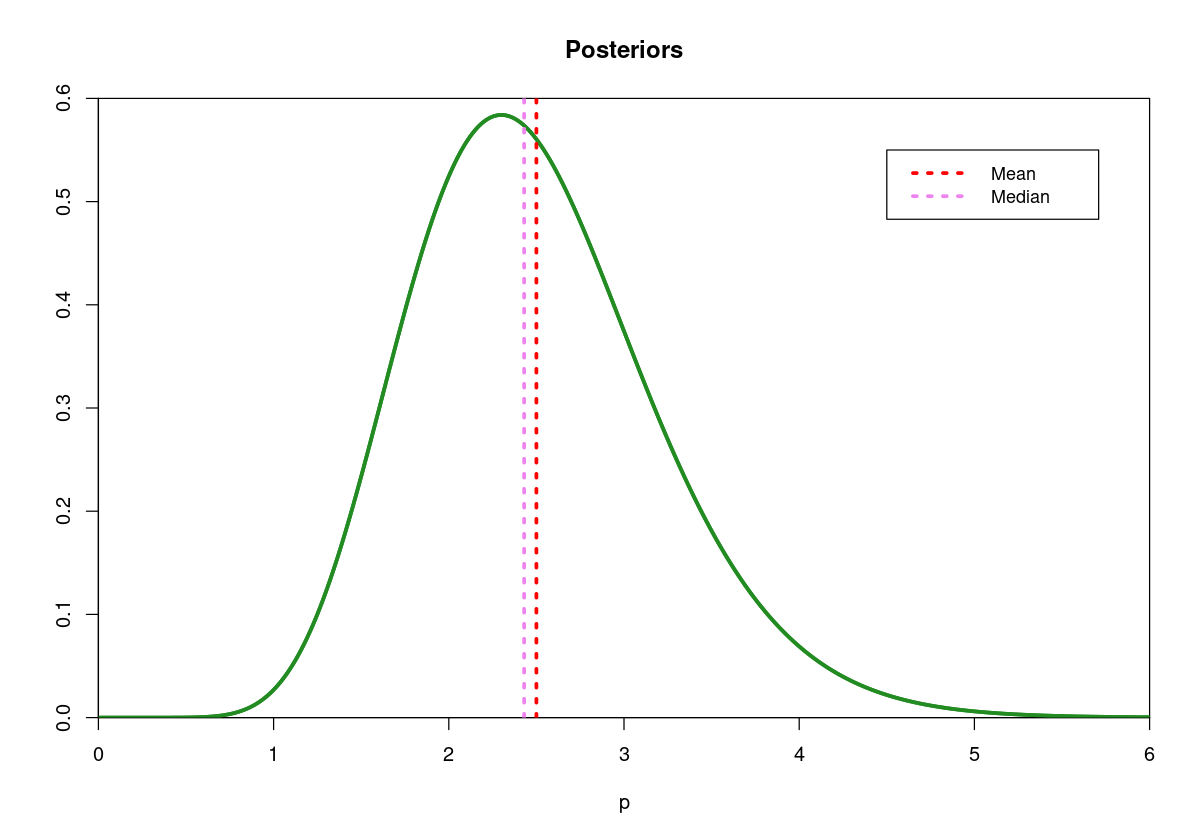

In [20]:
plot(mu,posteriorfromjeffrey(decay$counts,mu), xaxs='i', yaxs='i', col='forestgreen',
    type = 'l', lty = 1, lwd = 3,xlim=c(0,6),ylim=c(0,0.6), xlab='p', ylab="",main='Posteriors')

lines(mu,posteriorfromjeffrey(decay$counts,mu),col='forestgreen', type = 'l', lty = 1, lwd = 3)
abline(v=jeffreyanmean, col="red", lwd=3, lty=3)
abline(v=jeffreyanmedian, col="violet", lwd=3, lty=3)
legend(4.5, .55, legend=c("Mean", "Median"), col=c("red", "violet"), lty=3, cex=.9, lwd = 3)

### 1.3 Evaluate a 95% credibility interval for the results obtained with both priors.  Compare the resultwith that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [21]:
getcredibilityinterval <- function(dist,conf)
    {
        indx <- match(max(dist),dist)
        area <- max(dist)*step
        
        i <- 1
        j <- 1
        while(area < conf)
            {
                if (indx - j > 0 )
                    {
                        area <- area + ( dist[indx+i] + dist[indx-j] ) * step
                        i <- i + 1
                        j <- j + 1
                    }
                # This may solve some problems for distribution where the max is close to 0
                else
                    {
                        area <- area + ( dist[indx+i] ) * step
                        i <- i + 1
                    }
            }
    
        return( c( mu[indx-j] , mu[indx+i] ) ) 
    }

unifcred <- getcredibilityinterval(ex1posterior1(decay,mu),0.95)
jeffcred <- getcredibilityinterval(jpost,0.95)

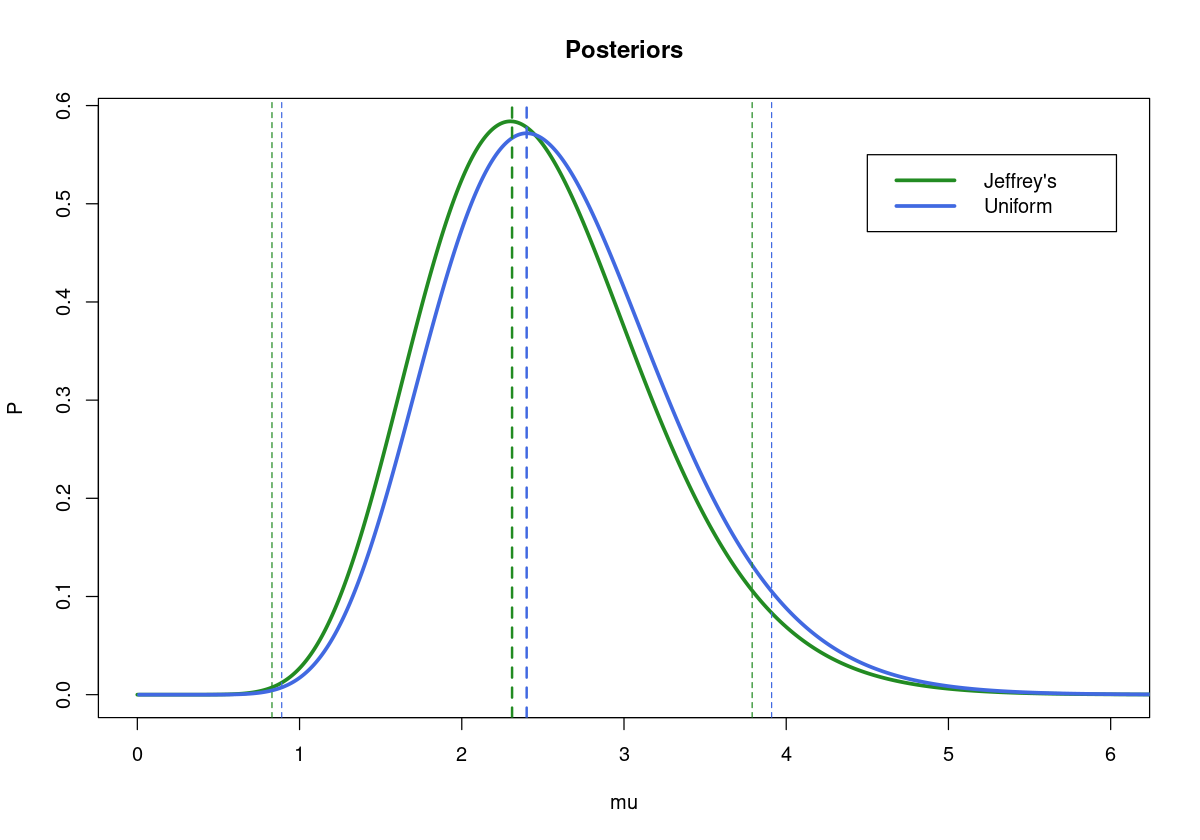

In [22]:
plot(jmu,jpost,pch='.',xlim=c(0,6),main='Posteriors',ylab='P',xlab='mu')
lines(jmu,jpost,col='forestgreen', lty = 1, lwd = 3)
lines(mu,ex1posterior1(decay,mu),col='royalblue', type = 'l', lty = 1, lwd = 3)

abline(v=numericalmode(jpost,step), col="forestgreen", lwd=2,lty=2)
abline(v=jeffcred[1], col="forestgreen", lwd=1,lty=2)
abline(v=jeffcred[2], col="forestgreen", lwd=1,lty=2)

abline(v=numericalmode(ex1posterior1(decay,mu),step), col="royalblue", lwd=2,lty=2)
abline(v=unifcred[1], col="royalblue", lwd=1,lty=2)
abline(v=unifcred[2], col="royalblue", lwd=1,lty=2)
legend(4.5, .55, legend=c("Jeffrey's", "Uniform"), col=c("forestgreen", "royalblue"), cex=1, lwd = 3)

In [23]:
meanandvariancefromgamma <- function(alpha,lambda)
    {
        mean <- alpha/lambda
        var  <- alpha/lambda^2
    
        return(c(mean,var))
    }

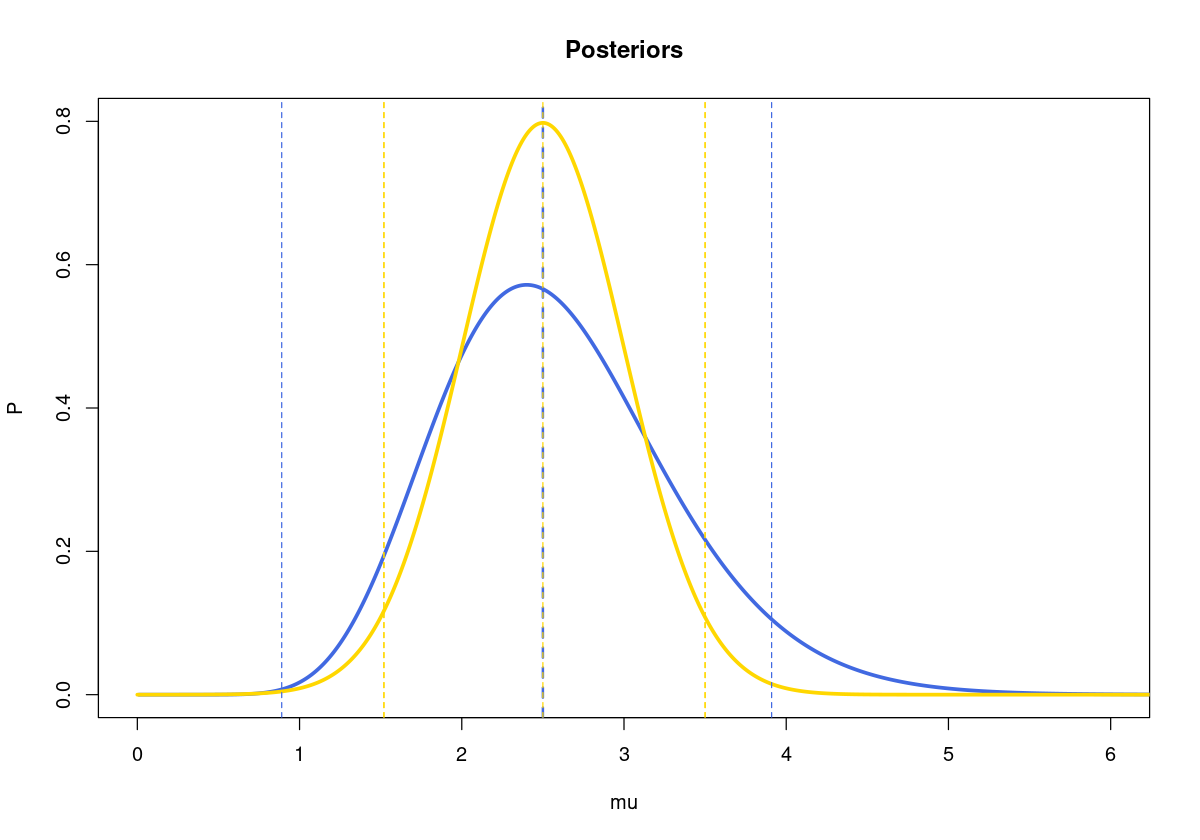

In [58]:
plot(mu,ex1posterior1(decay,mu),pch='.',xlim=c(0,6),ylim=c(0,0.8),main='Posteriors',ylab='P',xlab='mu')
lines(mu,ex1posterior1(decay,mu),col='royalblue', lty = 1, lwd = 3)
lines(jmu,dnorm(jmu, jeffreyanmean, jeffreyanvar ),col='gold',lwd = 3)

abline(v=jeffreyanmean, col='royalblue', lwd=2,lty=2)
abline(v=unifcred[1], col='royalblue', lwd=1,lty=2)
abline(v=unifcred[2], col='royalblue', lwd=1,lty=2)

abline(v=jeffreyanmean, col="gold", lwd=1,lty=2)
abline(v=getcredibilityinterval(dnorm(jmu, jeffreyanmean, jeffreyanvar ),0.95) , col="gold", lwd=1,lty=2)
abline(v=getcredibilityinterval(dnorm(jmu, jeffreyanmean, jeffreyanvar ),0.95) , col="gold", lwd=1,lty=2)

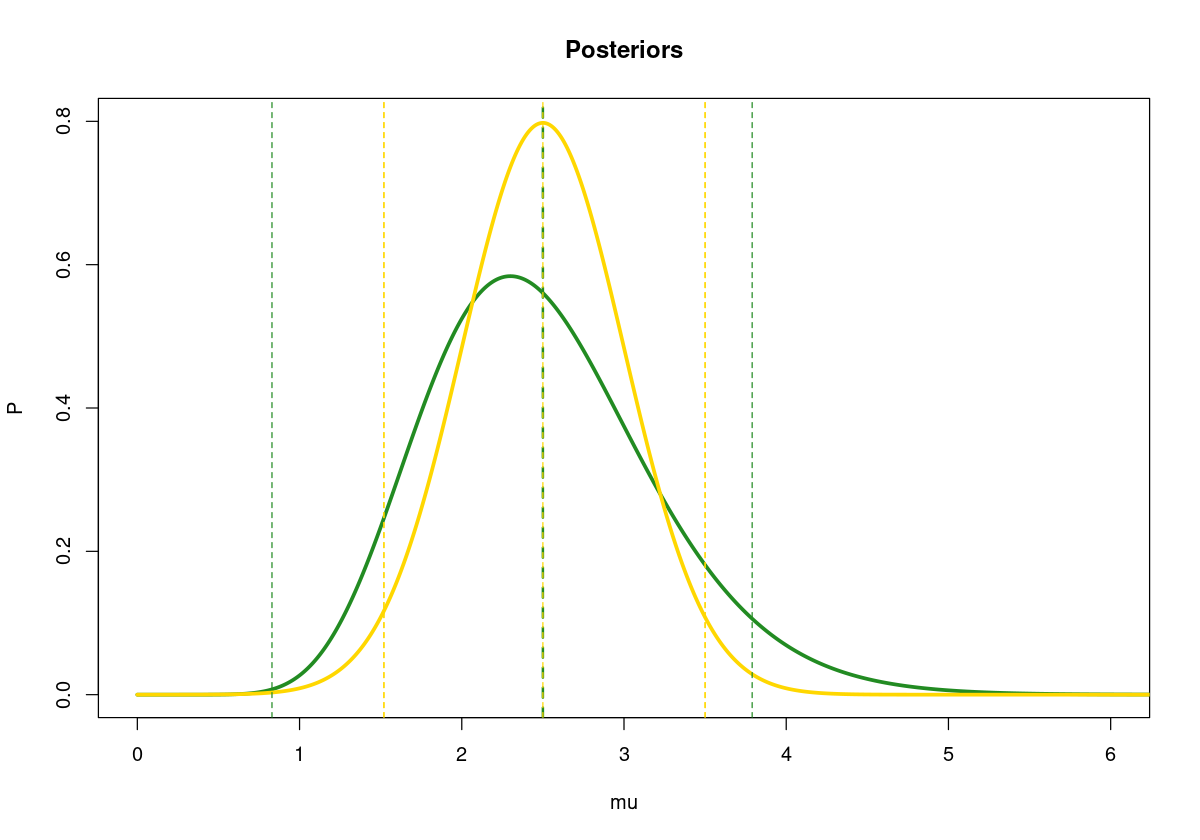

In [55]:
plot(jmu,jpost,pch='.',xlim=c(0,6),ylim=c(0,0.8),main='Posteriors',ylab='P',xlab='mu')
lines(jmu,jpost,col='forestgreen', lty = 1, lwd = 3)
lines(jmu,dnorm(jmu, jeffreyanmean, jeffreyanvar ),col='gold',lwd = 3)

abline(v=jeffreyanmean, col="forestgreen", lwd=2,lty=2)
abline(v=jeffcred[1], col="forestgreen", lwd=1,lty=2)
abline(v=jeffcred[2], col="forestgreen", lwd=1,lty=2)

abline(v=jeffreyanmean, col="gold", lwd=1,lty=2)
abline(v=getcredibilityinterval(dnorm(jmu, jeffreyanmean, jeffreyanvar ),0.95) , col="gold", lwd=1,lty=2)
abline(v=getcredibilityinterval(dnorm(jmu, jeffreyanmean, jeffreyanvar ),0.95) , col="gold", lwd=1,lty=2)

## Exercise 2

given the problem of the lightouse discussed last week, study the case in which both the position along the shore (α) and the distance out at sea (β) are unknown


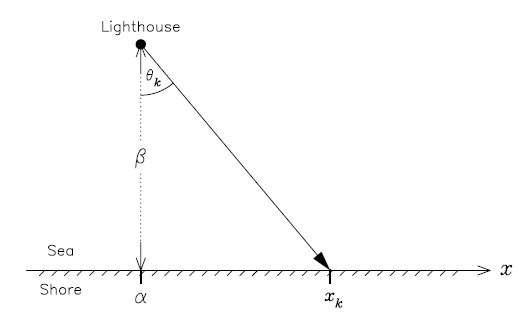

In [488]:
N       <- 1024
theta_k <- runif(N,-pi/2,pi/2)
x_k     <- beta_true * tan(theta_k) + alpha_true

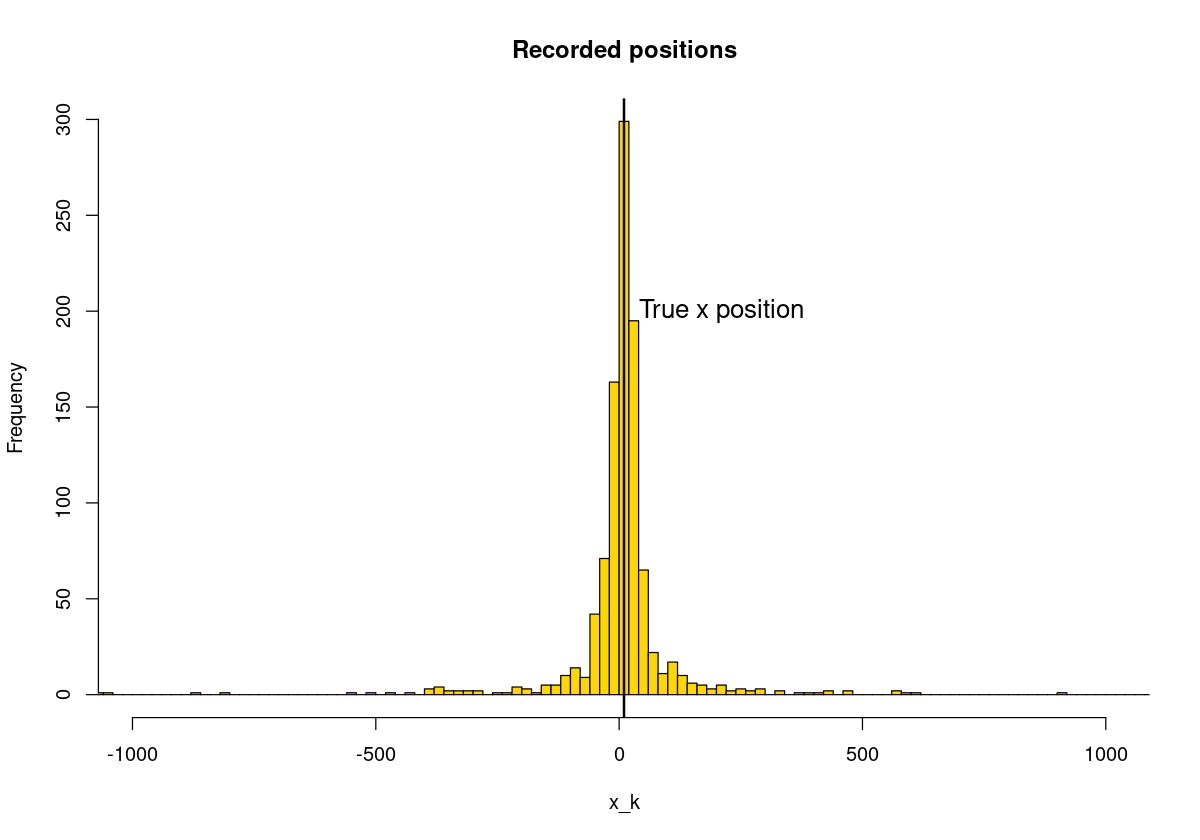

In [489]:
alpha_true = 10
beta_true = 20

hist(x_k,breaks=500,col='gold',main='Recorded positions',xlim=c(alpha_true-1000,alpha_true+1000))
abline(v=alpha_true, col="black", lwd=2,lty=1)
text(alpha_true+200, 200, "True x position",cex = 1.3, col = 1)

The likelihood of the data is:


$$p(\alpha,\beta|X)\propto p(X|\alpha,\beta)p(\alpha)p(\beta)$$

Assuming that $\alpha$ and $\beta$ must be positive and uniformly probable in some intervals:

$$P(\alpha)=\begin{cases}\frac{1}{\alpha_{max}-\alpha_{min}} & \text{for x $\in[\alpha_{min},\alpha_{max}]$}\\ 0 & \text{otherwise}\end{cases}$$

$$P(\beta) = \begin{cases} \frac{1}{\beta_{max}} & \text{for x $\in[0,\beta_{max}]$}\\ 0 & \text{otherwise}\end{cases}$$

Then 

$$p(\alpha,\beta|X)\propto p(X|\alpha,\beta)$$

(From the slides of the lesson)

$$p(\alpha,\beta|X)\propto p(X|\alpha,\beta) = \prod_j\frac{1}{\pi}\frac{\beta}{\beta^2+(x_j-\alpha)^2}$$

So we consider now the LogLikelihood

$$log(p(\alpha,\beta|X)\propto \sum\ln\left(\frac{\beta/\pi}{\left[\beta^2+(x_j -\alpha)^2\right]}\right)$$

In [490]:
make_log_posterior <- function (x_k, beta) {
  Vectorize(function (alpha_hat) {
              sum( log((beta/pi) / (beta^2 + (x_k - alpha_hat)^2)) )
           })
}

log_posterior <- make_log_posterior(x_k, beta_true)

posterior_shape <- function(xs, log_posterior) 
    {
      log_alphas    <- log_posterior(xs)        # compute log posterior for a grid of values
      log_alpha_max <- max(log_alphas)            
      alphas <- exp(log_alphas - log_alpha_max) # subtract from L_max, and exponentiate
      alphas                                    #  then the max value will be 1
    }

x2_k <- c(0,0,200,400,400)
log_posterior2 <- make_log_posterior(x2_k, beta_true)

xs <- seq(-100,500,len=1000)

In [491]:
log_joint_posterior <- function (x_k, alfa, beta) 
    {
        return(sum( log((beta/pi) / (beta^2 + (x_k - alfa)^2)) ))
    }

alpha_min <- 0
alpha_max <- 100
beta_max  <- 100

alphas <- seq(alpha_min, alpha_max)
betas  <- seq(        0, beta_max )

f <- function(a,b) log_joint_posterior(x_k, a, b)

$$ f(\alpha,\beta) =\sum\ln\left(\frac{\beta/\pi}{\left[\beta^2+(x_j -\alpha)^2\right]}\right)$$

In [492]:
log_grid_values <- outer(alphas, betas, Vectorize(f))

grid_values <- matrix(posterior_shape(log_grid_values, log_posterior),
                      nrow=length(alphas), ncol=length(betas))

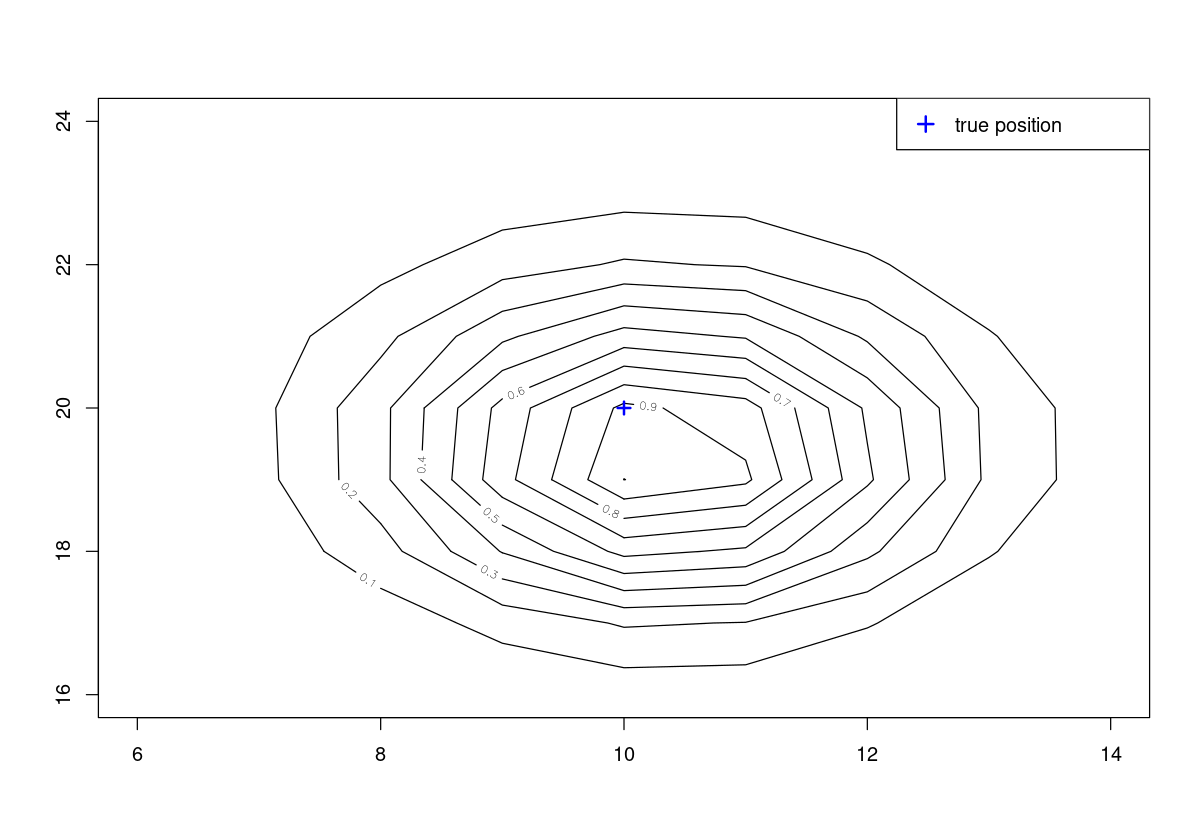

In [493]:
# Finally plot the contour
zoom = 4
contour(alphas, betas, grid_values, xlim=c(alpha_true-zoom,alpha_true+zoom), ylim=c(beta_true-zoom,beta_true+zoom))
points(alpha_true, beta_true, pch=3, col="blue", lwd=2) # true value
legend("topright",c("true position"), col="blue", pch=3, pt.cex=1.2, pt.lwd=2) 

## Exercise 3
given the Signal over Background example discussed last week, analyze and discuss the following cases:

### 3.1 Vary the sampling resolution of used to generate the data, keeping the same sampling range
`xdat <- seq(from=-7*w, to=7*w, by=0.5*w)`

### change the resolution w={0.1,0.25,1,2,3} and check the effect on the results

### 3.2 Change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior) and check the effect on the results